In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
import time

In [36]:
def throw_dice_player():
    print("Rolling the dice...", end='', flush=True)
    for _ in range(10):
        val = random.randint(1, 6)
        print(f"\rRolling the dice: {val}", end='', flush=True)
        plt.pause(0.1)
    print()
    return val

In [37]:
def board(loc):
    '''
    Moves and plots the player on the board.

    input:
    loc: dict, 0,1,2,3 for the four players (yellow=0, green=1, red=2, black=3), then (x,y) coordinates of the player on the board.
    '''

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    # Draw the main square
    square = plt.Rectangle((0, 0), 11, 11, facecolor='lemonchiffon', edgecolor='tab:red', linewidth=5)
    ax.add_patch(square)
    ax.set_xlim(0, 11)
    ax.set_ylim(0, 11)
    ax.set_aspect('equal')
    ax.axis('off')

    home_yellow = [(0.5, 10.5), (0.5, 9.5), (1.5, 10.5), (1.5, 9.5)]
    home_green = [(9.5, 9.5), (9.5, 10.5), (10.5, 9.5), (10.5, 10.5)]
    home_red = [(9.5, 0.5), (9.5, 1.5), (10.5, 0.5), (10.5, 1.5)]
    home_black = [(0.5, 0.5), (0.5, 1.5), (1.5, 0.5), (1.5, 1.5)]
 
    
    # Draw circles in corners
    for i, (x, y) in enumerate(home_yellow):
        circle = plt.Circle((x, y), 0.35, facecolor='yellow', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(home_green):
        circle = plt.Circle((x, y), 0.35, facecolor='limegreen', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(home_black):
        circle = plt.Circle((x, y), 0.35, facecolor='black', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(home_red):
        circle = plt.Circle((x, y), 0.35, facecolor='firebrick', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)

    pos_list = [(0.5, 6.5), (1.5, 6.5), (2.5, 6.5), (3.5, 6.5), (4.5, 6.5), (4.5, 7.5), (4.5, 8.5), (4.5, 9.5), (4.5, 10.5), (5.5, 10.5), 
    (6.5, 10.5), (6.5, 9.5), (6.5, 8.5), (6.5, 7.5), (6.5, 6.5), (7.5, 6.5), (8.5, 6.5), 
    (9.5, 6.5), (10.5, 6.5), (10.5, 5.5), (10.5, 4.5), (9.5, 4.5), (8.5, 4.5), (7.5, 4.5),
    (6.5, 4.5), (6.5, 3.5), (6.5, 2.5), (6.5, 1.5), (6.5, 0.5), (5.5, 0.5), (4.5, 0.5),
    (4.5, 1.5), (4.5, 2.5), (4.5, 3.5), (4.5, 4.5), (3.5, 4.5), (2.5, 4.5), (1.5, 4.5),
    (0.5, 4.5), (0.5, 5.5)]

    finish_yellow = [(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)]
    finish_green = [(5.5, 9.5), (5.5, 8.5), (5.5, 7.5), (5.5, 6.5)]
    finish_black = [(5.5, 1.5), (5.5, 2.5), (5.5, 3.5), (5.5, 4.5)]
    finish_red = [(9.5, 5.5), (8.5, 5.5), (7.5, 5.5), (6.5, 5.5)]
    

    for i, (x, y) in enumerate(pos_list):
        circle = plt.Circle((x, y), 0.35, facecolor='lightblue', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
        ax.text(x, y, str(i), fontsize=12, ha='center', va='center')
    for i, (x, y) in enumerate(finish_yellow):
        circle = plt.Circle((x, y), 0.35, facecolor='yellow', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(finish_green):
        circle = plt.Circle((x, y), 0.35, facecolor='limegreen', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(finish_black):
        circle = plt.Circle((x, y), 0.35, facecolor='black', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)
    for i, (x, y) in enumerate(finish_red):
        circle = plt.Circle((x, y), 0.35, facecolor='firebrick', fill=True, edgecolor='black', linewidth=0.5)
        ax.add_patch(circle)


    for player, positions in enumerate(loc):
        if player == 0:
            color = 'yellow'
        elif player == 1:
            color = 'limegreen'
        elif player == 2:
            color = 'firebrick'
        else:
            color = 'black'
        
        for piece_num, (x, y) in enumerate(positions):
            circle = plt.Circle((x, y), 0.2, facecolor=color, fill=True, edgecolor='gray', linewidth=2)
            ax.add_patch(circle)
            if player == 3 or player == 2:
                ax.text(x, y, str(piece_num+1), fontsize=12, ha='center', va='center', color='white')
            else:
                ax.text(x, y, str(piece_num+1), fontsize=12, ha='center', va='center')

    
   
    plt.show()

In [38]:
def bot_strat_1(loc, pos_list, player, dice_value):
    '''
    Bot strategy 1: Move the piece that is closest to the finish line.
    '''
    onfield = [False] * 4  # Track if a player is on the field
    canmove = [True] * 4
    unsafelist = [True] * 4  # Track if a player is safe

    finish_conditions=[[(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)],
                       [(5.5, 9.5), (5.5, 8.5), (5.5, 7.5), (5.5, 6.5)],
                       [(5.5, 1.5), (5.5, 2.5), (5.5, 3.5), (5.5, 4.5)],
                       [(9.5, 5.5), (8.5, 5.5), (7.5, 5.5), (6.5, 5.5)]]
    

    for i, (x, y) in enumerate(loc[player]):
        if (x,y) in finish_conditions[player]:
            unsafelist[i] = False
        elif (x, y) in pos_list:
            onfield[i] = True  # Player is on the field if their position is not in pos_list
            pos_in_pos_list = pos_list.index((x, y))
            for (x, y) in loc[player]:
                if pos_in_pos_list + dice_value >= len(pos_list):
                    continue
                if pos_list[pos_in_pos_list + dice_value] == (x, y):
                    canmove[i] = False
        else:
            if pos_list[0] in loc[player]:
                canmove[i] = False
            if dice_value != 6:
                canmove[i] = False
        
    if True in canmove:
        if dice_value == 6 and False in onfield and pos_list[0] not in loc[player]:
            indices_offfield = [i+1 for i, x in enumerate(onfield) if not x and unsafelist[i]]            
            
            if len(indices_offfield) == 4:
                move_piece = random.choice(indices_offfield) - 1
                loc[player][move_piece] = pos_list[0]
                return loc

                
            else:
                move_piece = np.argmax([pos_list.index(loc[player][i]) for i in range(4) if canmove[i] and unsafelist[i]])

                current_pos = loc[player][move_piece]
                pos_in_pos_list = pos_list.index(current_pos)
                new_pos_index = pos_in_pos_list + dice_value
                if new_pos_index >= len(pos_list):
                    unsafelist[move_piece] = False
                    loc[player][move_piece] = finish_conditions[player][sum(unsafelist)]
                    print(f"{move_piece+1} is safe.")
                    return loc
                loc[player][move_piece] = pos_list[new_pos_index]
                return loc

        elif True in onfield:            
            move_piece = np.argmax([pos_list.index(loc[player][i]) for i in range(4) if canmove[i] and unsafelist[i]])
            
            current_pos = loc[player][move_piece]
            pos_in_pos_list = pos_list.index(current_pos)
            new_pos_index = pos_in_pos_list + dice_value
            if new_pos_index >= len(pos_list):
                unsafelist[move_piece] = False
                loc[player][move_piece] = finish_conditions[player][sum(unsafelist)]
                return loc
            loc[player][move_piece] = pos_list[new_pos_index]
            return loc
    return loc

In [39]:
def bot_strat_2(loc, pos_list, player, dice_value):
    '''
    Bot strategy 2: Move the piece that is furthest from the finish line.
    '''
    canmove = [False] * 4
    for i in range(4):
        if loc[player][i] != (0.5, 10.5) and loc[player][i] != (0.5, 9.5) and loc[player][i] != (1.5, 10.5) and loc[player][i] != (1.5, 9.5):
            canmove[i] = True

    if not any(canmove):
        return loc

    # Find the piece furthest from the finish line
    furthest_piece = max(range(4), key=lambda i: pos_list.index(loc[player][i]) if canmove[i] else -1)
    
    # Move the furthest piece
    new_pos_index = pos_list.index(loc[player][furthest_piece]) + dice_value
    if new_pos_index >= len(pos_list):
        new_pos_index = len(pos_list) - 1
    loc[player][furthest_piece] = pos_list[new_pos_index]
    
    return loc

In [40]:
def bot_strat_3(loc, pos_list, player, dice_value):
    '''
    Bot strategy 3: Move a random piece.
    '''
    
    
    return loc

In [41]:
def move_bot(loc, botstrats):

    base_pos_list = [(0.5, 6.5), (1.5, 6.5), (2.5, 6.5), (3.5, 6.5), (4.5, 6.5), (4.5, 7.5), (4.5, 8.5), (4.5, 9.5), (4.5, 10.5), (5.5, 10.5), 
    (6.5, 10.5), (6.5, 9.5), (6.5, 8.5), (6.5, 7.5), (6.5, 6.5), (7.5, 6.5), (8.5, 6.5), 
    (9.5, 6.5), (10.5, 6.5), (10.5, 5.5), (10.5, 4.5), (9.5, 4.5), (8.5, 4.5), (7.5, 4.5),
    (6.5, 4.5), (6.5, 3.5), (6.5, 2.5), (6.5, 1.5), (6.5, 0.5), (5.5, 0.5), (4.5, 0.5),
    (4.5, 1.5), (4.5, 2.5), (4.5, 3.5), (4.5, 4.5), (3.5, 4.5), (2.5, 4.5), (1.5, 4.5),
    (0.5, 4.5), (0.5, 5.5)]
    
    for player in [1,2,3]: #0 is the human player
        dice_value = random.randint(1, 6)
        print(f'Bot {player} rolled a {dice_value}.')

        pos_list = base_pos_list[10*player:] + base_pos_list[:10*player]   
        
        if botstrats[player-1] == 1:
            loc = bot_strat_1(loc, pos_list, player, dice_value)

        elif botstrats[player-1] == 2:
            loc = bot_strat_2(loc, pos_list, player, dice_value)

        elif botstrats[player-1][0] == 3:
            loc = bot_strat_3(loc, pos_list, player, dice_value)
        
    return loc

In [42]:
def move(loc):
    dice_value = throw_dice_player()
    print(f"You rolled a {dice_value}!")
    
    pos_list = [(0.5, 6.5), (1.5, 6.5), (2.5, 6.5), (3.5, 6.5), (4.5, 6.5), (4.5, 7.5), (4.5, 8.5), (4.5, 9.5), (4.5, 10.5), (5.5, 10.5), 
    (6.5, 10.5), (6.5, 9.5), (6.5, 8.5), (6.5, 7.5), (6.5, 6.5), (7.5, 6.5), (8.5, 6.5), 
    (9.5, 6.5), (10.5, 6.5), (10.5, 5.5), (10.5, 4.5), (9.5, 4.5), (8.5, 4.5), (7.5, 4.5),
    (6.5, 4.5), (6.5, 3.5), (6.5, 2.5), (6.5, 1.5), (6.5, 0.5), (5.5, 0.5), (4.5, 0.5),
    (4.5, 1.5), (4.5, 2.5), (4.5, 3.5), (4.5, 4.5), (3.5, 4.5), (2.5, 4.5), (1.5, 4.5),
    (0.5, 4.5), (0.5, 5.5)]

    onfield = [False] * 4  # Track if a player is on the field
    canmove = [True] * 4
    unsafelist = [True] * 4  # Track if a player is safe

    for i, (x, y) in enumerate(loc[0]):
        if (x,y) in [(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)]:
            unsafelist[i] = False
        elif (x, y) in pos_list:
            onfield[i] = True  # Player is on the field if their position is not in pos_list
            pos_in_pos_list = pos_list.index((x, y))
            for (x, y) in loc[0]:
                if pos_in_pos_list + dice_value >= len(pos_list):
                    continue
                if pos_list[pos_in_pos_list + dice_value] == (x, y):
                    canmove[i] = False
        else:
            if (0.5, 6.5) in loc[0]:
                canmove[i] = False
            if dice_value != 6:
                canmove[i] = False
        
    if True in canmove:
        if dice_value == 6 and False in onfield and (0.5, 6.5) not in loc[0]:
            indices_offfield = [i+1 for i, x in enumerate(onfield) if not x and unsafelist[i]]
            print(f"You rolled a 6 and could place {indices_offfield} onto the board.")
            
            indices_infield = [i+1 for i, x in enumerate(canmove) if x and i+1 not in indices_offfield and unsafelist[i]]
            if indices_infield:
                print(f"or you could move {indices_infield}.")
            
            move_piece = int(input("Which piece do you want to move? (1-4): ")) - 1
        
            if move_piece+1 in indices_offfield:
                loc[0][move_piece] = (0.5, 6.5)
                return loc
                
            else:
                current_pos = loc[0][move_piece]
                pos_in_pos_list = pos_list.index(current_pos)
                new_pos_index = pos_in_pos_list + dice_value
                if new_pos_index >= len(pos_list):
                    unsafelist[move_piece] = False
                    loc[0][move_piece] = [(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)][sum(unsafelist)]
                    print(f"{move_piece+1} is safe.")
                    return loc
                loc[0][move_piece] = pos_list[new_pos_index]
                return loc

        elif True in onfield:
            indices_infield = [i+1 for i, x in enumerate(canmove) if x and 
            unsafelist[i]]
            print(f"You could move {indices_infield}.")
            
            move_piece = int(input("Which piece do you want to move? (1-4): ")) - 1
            if move_piece not in [0,1,2,3] or not canmove[move_piece]:
                print("Invalid piece selection. Please try again.")
                return loc
            
            current_pos = loc[0][move_piece]
            pos_in_pos_list = pos_list.index(current_pos)
            new_pos_index = pos_in_pos_list + dice_value
            if new_pos_index >= len(pos_list):
                unsafelist[move_piece] = False
                loc[0][move_piece] = [(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)][sum(unsafelist)]
                print(f"{move_piece+1} is safe.")
                return loc
            loc[0][move_piece] = pos_list[new_pos_index]
            return loc

        else:
            print("You cannot move any of your pieces. You have to pass your turn.")
    else:
        print("You cannot move any of your pieces. You have to pass your turn.")

    return loc

In [43]:
def haswon(loc):
    finish_conditions=[[(1.5, 5.5), (2.5, 5.5), (3.5, 5.5), (4.5, 5.5)],
                       [(5.5, 9.5), (5.5, 8.5), (5.5, 7.5), (5.5, 6.5)],
                       [(5.5, 1.5), (5.5, 2.5), (5.5, 3.5), (5.5, 4.5)],
                       [(9.5, 5.5), (8.5, 5.5), (7.5, 5.5), (6.5, 5.5)]]

    for player in range(4):
        if all(pos in finish_conditions[player] for pos in loc[player]):
            if player == 0:
                print("You have won the game!")
            else:
                print(f"Bot {player} has won the game!")        
            return True
        
    return False

In [44]:
def main():
    plt.ion()  # Enable interactive mode
    
    loc = [[(0.5, 10.5), (1.5, 10.5), (0.5, 9.5), (1.5, 9.5)],
        [(9.5, 10.5), (10.5, 10.5), (9.5, 9.5), (10.5, 9.5)],
        [(9.5, 1.5), (10.5, 1.5), (9.5, 0.5), (10.5, 0.5)],
        [(0.5, 1.5), (1.5, 1.5), (0.5, 0.5),  (1.5, 0.5)]]

    botstrats = [np.random.randint(1, 3) for _ in range(3)]  # Random strategies for bots
    botstrats = [1, 1,1]  # For testing purposes, you can set specific strategies
    print(f"Bot strategies: {botstrats}")

    won = False
    while not won:        
        print("YOUR TURN")
        loc = move(loc)
        
        print("\nBOT TURNS")
        loc = move_bot(loc, botstrats)
        
        time.sleep(2)

        #clear_output(wait=True)  # Clear text output before player's turn

        board(loc)  # Update board after all moves

        won = haswon(loc)

Bot strategies: [1, 1, 1]
YOUR TURN
Rolling the dice: 2
You rolled a 2!
You cannot move any of your pieces. You have to pass your turn.

BOT TURNS
Bot 1 rolled a 3.
Bot 2 rolled a 2.
Bot 3 rolled a 5.


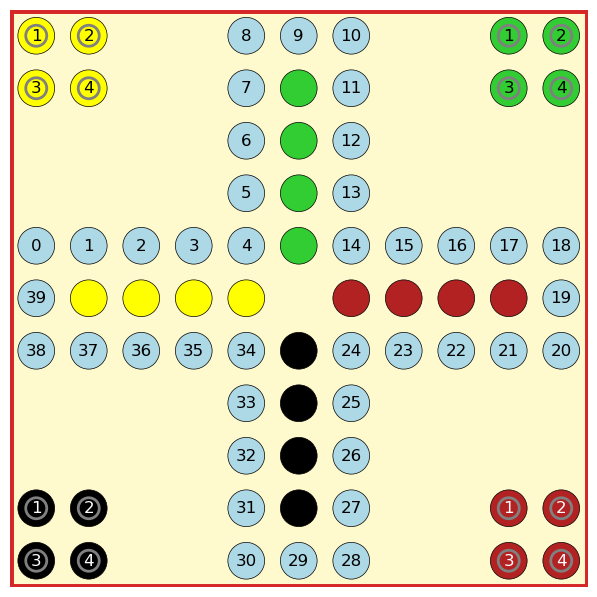

YOUR TURN
Rolling the dice: 5
You rolled a 5!
You cannot move any of your pieces. You have to pass your turn.

BOT TURNS
Bot 1 rolled a 5.
Bot 2 rolled a 2.
Bot 3 rolled a 2.


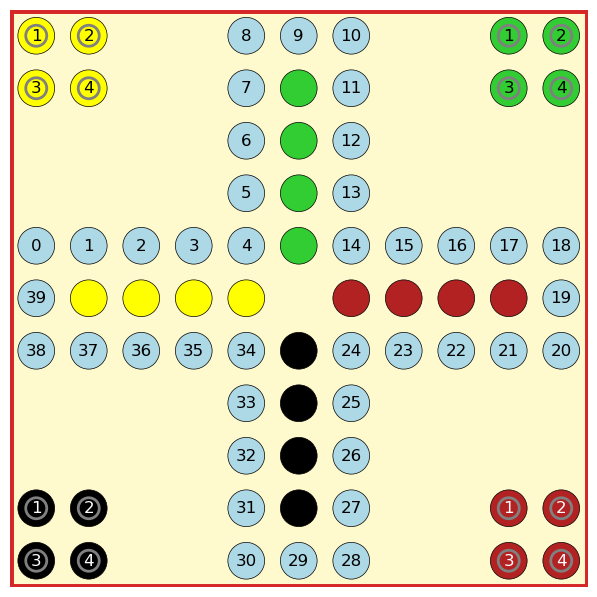

YOUR TURN
Rolling the dice: 1
You rolled a 1!
You cannot move any of your pieces. You have to pass your turn.

BOT TURNS
Bot 1 rolled a 5.
Bot 2 rolled a 1.
Bot 3 rolled a 3.


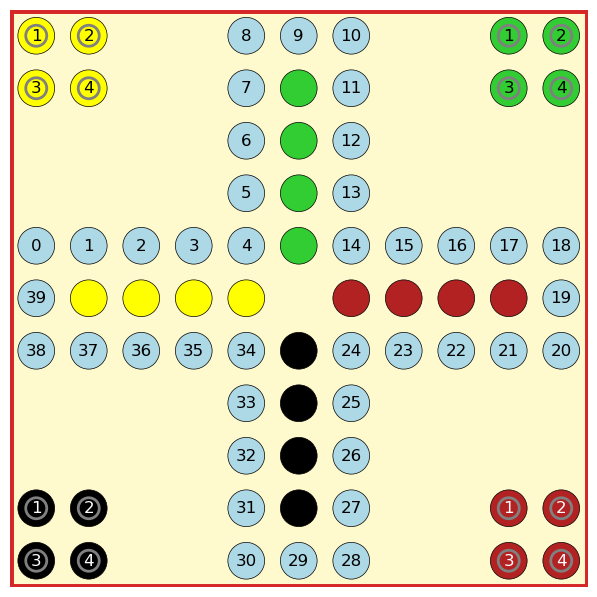

YOUR TURN
Rolling the dice: 4
You rolled a 4!
You cannot move any of your pieces. You have to pass your turn.

BOT TURNS
Bot 1 rolled a 6.
Bot 2 rolled a 6.
Bot 3 rolled a 2.


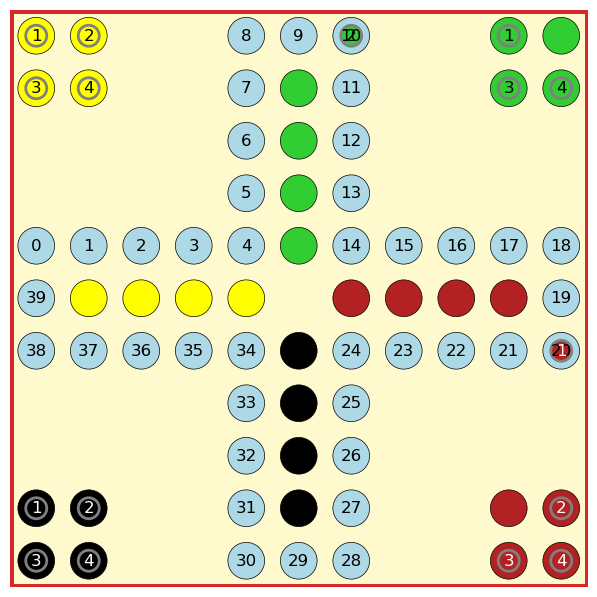

YOUR TURN
Rolling the dice: 3
You rolled a 3!
You cannot move any of your pieces. You have to pass your turn.

BOT TURNS
Bot 1 rolled a 5.


ValueError: (9.5, 10.5) is not in list

In [45]:
# Game execution
main()